In [2]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import yfinance as yf
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
%matplotlib inline

# PART I - DATA CAPTURE

## Historical Data using 'Close' Price for Top 10 Crypto:

In [3]:
# Top 10 Crypto Coin Yahoo Finance Tickers
tickers = ['BTC-USD','ETH-USD','BNB-USD','XRP-USD', 'SOL-USD','LUNA1-USD','ADA-USD','AVAX-USD','DOT-USD','DOGE-USD']

In [4]:
#Get closing prices from start 2016 to present 
# IGNORE ERROR THIS IS BC THE CRYPTOS DIDNT EXIST AT THAT TIME
 
start = dt.datetime(2016, 1, 1)
end = dt.datetime(2022, 5, 5)
 
crypto_2016_present = pdr.get_data_yahoo(tickers, start, end)

crypto_2016_present["Close"].tail()

Symbols,BTC-USD,ETH-USD,BNB-USD,XRP-USD,SOL-USD,LUNA1-USD,ADA-USD,AVAX-USD,DOT-USD,DOGE-USD
Date,,,,,,,,,,
2022-05-02,38529.328125,2857.410400,389.670654,0.614269,87.581017,84.309166,0.781529,60.517105,14.978443,0.130938
2022-05-03,37750.453125,2783.476318,383.475800,0.604849,85.842377,82.594147,0.771145,59.660107,14.727037,0.129520
2022-05-04,39698.371094,2940.644775,402.502655,0.646474,92.770851,86.172264,0.896942,67.086105,16.305258,0.135809
2022-05-05,36575.140625,2749.213135,378.773621,0.598886,84.596024,82.580406,0.791152,59.127441,14.581028,0.128430
2022-05-06,36040.921875,2694.979736,379.304291,0.602570,81.764107,77.464806,0.783359,57.034325,14.313102,0.127901


In [5]:
#Get closing prices for cryptos from start of 2016 to present and calculating daily returns
 
daily_returns_2016_present = crypto_2016_present['Close'].pct_change()
daily_returns_2016_present.tail()

Symbols,BTC-USD,ETH-USD,BNB-USD,XRP-USD,SOL-USD,LUNA1-USD,ADA-USD,AVAX-USD,DOT-USD,DOGE-USD
Date,,,,,,,,,,
2022-05-02,0.001566,0.010487,-0.001566,0.010570,-0.023313,0.025166,-0.011153,0.028221,-0.026219,-0.013821
2022-05-03,-0.020215,-0.025875,-0.015898,-0.015335,-0.019852,-0.020342,-0.013287,-0.014161,-0.016785,-0.010830
2022-05-04,0.051600,0.056465,0.049617,0.068819,0.080712,0.043322,0.163130,0.124472,0.107165,0.048556
2022-05-05,-0.078674,-0.065099,-0.058954,-0.073612,-0.088118,-0.041682,-0.117945,-0.118634,-0.105747,-0.054334
2022-05-06,-0.014606,-0.019727,0.001401,0.006151,-0.033476,-0.061947,-0.009850,-0.035400,-0.018375,-0.004119


## Historical Data using 'Close' Price for SPY ETF (to represent S&P 500) and QQQ (to represent NASDAQ 100):

In [6]:
#Get closing prices from start 2016 to present for SPY ETF (to represent S&P 500) and get daily returns
 
start = dt.datetime(2016, 1, 1)
end = dt.datetime(2022, 5, 5)
 
spy_2016_present = pdr.get_data_yahoo("SPY", start, end)

spy_2016_present_daily_returns = spy_2016_present["Close"].pct_change().dropna()
spy_2016_present_daily_returns

Date
2016-01-05    0.001691
2016-01-06   -0.012614
2016-01-07   -0.023992
2016-01-08   -0.010977
2016-01-11    0.000990
                ...   
2022-04-29   -0.036956
2022-05-02    0.006019
2022-05-03    0.004584
2022-05-04    0.030453
2022-05-05   -0.035543
Name: Close, Length: 1596, dtype: float64

In [7]:
#Get closing prices from start 2016 to present for QQQ ETF (to represent NASDAQ 100) and get daily returns
 
start = dt.datetime(2016, 1, 1)
end = dt.datetime(2022, 5, 5)
 
qqq_2016_present = pdr.get_data_yahoo("QQQ", start, end)

qqq_2016_present_daily_returns = qqq_2016_present["Close"].pct_change().dropna()
qqq_2016_present_daily_returns

Date
2016-01-05   -0.001735
2016-01-06   -0.009606
2016-01-07   -0.031313
2016-01-08   -0.008201
2016-01-11    0.003077
                ...   
2022-04-29   -0.044999
2022-05-02    0.016696
2022-05-03    0.001068
2022-05-04    0.033812
2022-05-05   -0.050364
Name: Close, Length: 1596, dtype: float64

In [8]:
# Add SPY ETF daily returns and QQQ ETF daily returns to a dataframe with BTC daily returns 

btc_spy_qqq = pd.DataFrame(data=[daily_returns_2016_present["BTC-USD"], spy_2016_present_daily_returns, qqq_2016_present_daily_returns]) 
btc_spy_qqq = btc_spy_qqq.T
column_names = ["BTC-USD", "SPY", "QQQ"]
btc_spy_qqq.columns = column_names
btc_spy_qqq.dropna(inplace=True)

btc_spy_qqq

,BTC-USD,SPY,QQQ
Date,,,
2016-01-05,-0.002611,0.001691,-0.001735
2016-01-06,-0.006609,-0.012614,-0.009606
2016-01-07,0.067450,-0.023992,-0.031313
2016-01-08,-0.010519,-0.010977,-0.008201
2016-01-11,0.000975,0.000990,0.003077
...,...,...,...
2022-04-29,-0.029266,-0.036956,-0.044999
2022-05-02,0.001566,0.006019,0.016696
2022-05-03,-0.020215,0.004584,0.001068


## Market Cap For Top 10 Crypto

In [9]:
# Get market cap for top 10 crypto coins 
mc_data = pdr.get_quote_yahoo(tickers)
mc = mc_data['marketCap']
mc.sort_values()


DOT-USD       13339550720
AVAX-USD      14274132992
DOGE-USD      16710402048
LUNA1-USD     22989707264
ADA-USD       25607751680
SOL-USD       25643356160
XRP-USD       27768195072
BNB-USD       58624122880
ETH-USD      309835890688
BTC-USD      659869597696
Name: marketCap, dtype: int64

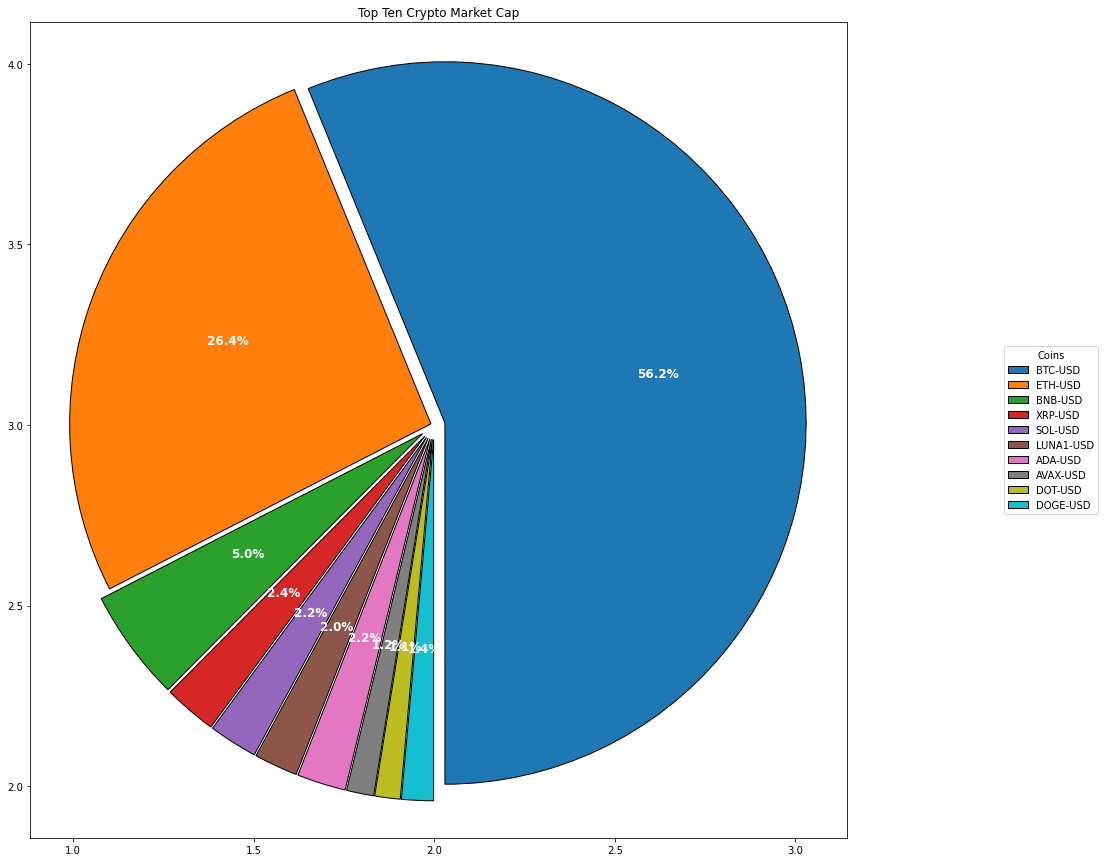

In [10]:
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal"))
wedgeprops = {"linewidth": 1, 'width':1, "edgecolor":"k"} # Width = 1

data = mc
tick = tickers

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n".format(pct, absolute)


wedges, texts , autotexts = ax.pie(
    data, autopct=lambda pct: func(pct, data),
    textprops=dict(color="w"),
    explode = [0.03,0.01,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04],
    #shadow = True,
    pctdistance = 0.6, 
    labeldistance = 1.6, 
    startangle = 270,
    radius = 1, 
    counterclock = True, 
    wedgeprops = wedgeprops,
    center=(2, 3),
    frame=True,
    #rotatelabels=True 
    )

ax.legend(wedges, tick,
          title="Coins",
          loc="center",
          bbox_to_anchor=(1, 0, 0.5, 1),
          
          )

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Top Ten Crypto Market Cap")

plt.show()

# PART II - ANALYZING CRYPTO-TO-CRYPTO TO COMPARE RETURNS, VOLATILITY, RISK/RETURN PROFILE, AND CORRELATIONS


# Volatility with Standard Deviation, 2018 - Present:

In [11]:
daily_returns_2018_present = daily_returns_2016_present.loc["2018-01-01":"2022-5-05"]

daily_returns_stats = daily_returns_2018_present.describe().T.sort_values(by=['std'],ascending=False)
display(daily_returns_stats)
daily_returns_std = daily_returns_stats["std"]

,count,mean,std,min,25%,50%,75%,max
Symbols,,,,,,,,
DOGE-USD,1586.0,0.005474,0.116509,-0.402570,-0.024309,-0.001371,0.019117,3.555466
SOL-USD,755.0,0.009322,0.082926,-0.372088,-0.037863,0.001606,0.050275,0.472828
LUNA1-USD,1014.0,0.007228,0.082895,-0.385899,-0.032322,-0.002452,0.033323,0.899124
AVAX-USD,661.0,0.006764,0.079929,-0.364950,-0.036082,0.000000,0.038036,0.750013
DOT-USD,623.0,0.005169,0.073133,-0.379335,-0.030284,0.000000,0.031913,0.559877
XRP-USD,1586.0,0.001035,0.062114,-0.423340,-0.023380,-0.001456,0.020920,0.560109
BNB-USD,1586.0,0.004161,0.061017,-0.419046,-0.022756,0.001086,0.028376,0.697604
ADA-USD,1586.0,0.001885,0.060818,-0.395672,-0.030241,-0.000074,0.030158,0.379604
ETH-USD,1586.0,0.002103,0.050250,-0.423472,-0.021550,0.001205,0.027508,0.259475


In [12]:
# Note: Do blox plot too!

plot_avg_daily_returns = daily_returns_stats['std'].hvplot.bar(
    title = "Volatility Between Top 10 Cryptocurrencies by Market Cap, 2018 to Present",
    height = 600,
    width = 1200,
    color = "red"
)
plot_avg_daily_returns

# NOTE: Doge has the largest volitility (considerably), followed by LUNA and SOL which are relatively close.

:Bars   [Symbols]   (std)

In [13]:
# Calculate and plot cumulative returns for top 10 cryptos by market cap from 2018 to present

cumulative_crypto_returns = (1 + daily_returns_2018_present).cumprod()
cumulative_crypto_returns.hvplot( 
    title="Cumulative Cryptocurrency Returns, 2018 to Present",
    width = 1200,
    height = 600,
    hover_color="black"
)

# NOTE: SOL, LUNA, and BNB have provided the best cumulative returns.

:NdOverlay   [Symbols]
   :Curve   [Date]   (value)

In [14]:
# Calculate and plot cumulative returns for top 10 cryptos by market cap from May 2020 to present

daily_returns_2020_present = daily_returns_2016_present.loc["2020-05-05":"2022-5-05"]

cumulative_crypto_returns = (1 + daily_returns_2020_present).cumprod()
cumulative_crypto_returns.hvplot( 
    title="Cumulative Cryptocurrency Returns, May 2020 - May 2022",
    width = 1200,
    height = 600,
    hover_color="black"
)

# NOTE: LUNA, SOL, and DOGE have provided the best cumulative returns.

:NdOverlay   [Symbols]
   :Curve   [Date]   (value)

# Sharpe Ratios, 2018 to Present:

In [15]:
year_trading_days = 252
average_annual_returns = daily_returns_2018_present.mean() * year_trading_days
average_annual_returns

Symbols
BTC-USD      0.347537
ETH-USD      0.529979
BNB-USD      1.048632
XRP-USD      0.260806
SOL-USD      2.349165
LUNA1-USD    1.821481
ADA-USD      0.475123
AVAX-USD     1.704415
DOT-USD      1.302710
DOGE-USD     1.379518
dtype: float64

In [16]:
annualized_stds = daily_returns_std * np.sqrt(year_trading_days)
annualized_stds

Symbols
DOGE-USD     1.849528
SOL-USD      1.316405
LUNA1-USD    1.315911
AVAX-USD     1.268826
DOT-USD      1.160947
XRP-USD      0.986034
BNB-USD      0.968616
ADA-USD      0.965452
ETH-USD      0.797697
BTC-USD      0.621975
Name: std, dtype: float64

In [17]:
sharpe_ratios = (average_annual_returns / annualized_stds).sort_values(ascending = False) 
sharpe_ratios

# The Sharpe ratio adjusts a portfolio’s performance for the excess risk that was taken by the investor.
# Except for XRP, these Sharpe ratios are within the "good" range (1.0 - 1.99). When selecting assets, 
# we prefer a higher Sharpe ratio. So in this case, LUNA, SOL, and ETH are winners based on this metric.

Symbols
SOL-USD      1.784530
LUNA1-USD    1.384198
AVAX-USD     1.343300
DOT-USD      1.122110
BNB-USD      1.082608
DOGE-USD     0.745875
ETH-USD      0.664387
BTC-USD      0.558764
ADA-USD      0.492125
XRP-USD      0.264500
dtype: float64

In [18]:
plot_sharpe_ratios = sharpe_ratios.hvplot.bar(
    title = "Sharpe Ratios 2018 to Present, Top Ten Cryptocurrencies by Market Cap", 
    width = 700,
    height = 400,
    hover_color = "black",
    color = "green"
)
plot_sharpe_ratios

:Bars   [Symbols]   (0)

# Variance - Covariance - Beta: 2018-Present:

# Variance, 2018-Present:

In [19]:
# Calculate daily returns for 2018 to present

daily_returns_2018_present = daily_returns_2016_present.loc["2018-01-01":"2022-5-05"]
daily_returns_2018_present.tail()

Symbols,BTC-USD,ETH-USD,BNB-USD,XRP-USD,SOL-USD,LUNA1-USD,ADA-USD,AVAX-USD,DOT-USD,DOGE-USD
Date,,,,,,,,,,
2022-05-01,0.019998,0.035737,0.033127,0.035349,0.053770,0.049722,0.044517,0.031695,0.059352,0.040892
2022-05-02,0.001566,0.010487,-0.001566,0.010570,-0.023313,0.025166,-0.011153,0.028221,-0.026219,-0.013821
2022-05-03,-0.020215,-0.025875,-0.015898,-0.015335,-0.019852,-0.020342,-0.013287,-0.014161,-0.016785,-0.010830
2022-05-04,0.051600,0.056465,0.049617,0.068819,0.080712,0.043322,0.163130,0.124472,0.107165,0.048556
2022-05-05,-0.078674,-0.065099,-0.058954,-0.073612,-0.088118,-0.041682,-0.117945,-0.118634,-0.105747,-0.054334


In [20]:
variance_18_p = daily_returns_2018_present.var().sort_values(ascending = False)
variance_18_p

Symbols
DOGE-USD     0.013574
SOL-USD      0.006877
LUNA1-USD    0.006872
AVAX-USD     0.006389
DOT-USD      0.005348
XRP-USD      0.003858
BNB-USD      0.003723
ADA-USD      0.003699
ETH-USD      0.002525
BTC-USD      0.001535
dtype: float64

### Covariance, 2018-Present:

In [21]:
# Calculating covariance for 2018 - Present
# Note: Covariance measures the directional relationship between an asset and another; how an asset's risk moves in relation to another asset's risk.
# Covariance can maximize diversification in a portfolio of assets. Adding assets with a negative covariance to a portfolio reduces the overall risk.
# Because all of these covariances are positive, this implies that it is difficult to aptly diversify with these cryptocurrencies.

cov_list = []

for ticker in tickers:
    cov_list.append(daily_returns_2018_present['BTC-USD'].cov(daily_returns_2018_present[ticker]))

cov_df = pd.DataFrame(data=cov_list, index=tickers)
cov_df.columns = ["Covariance with BTC"]

cov_df.sort_values("Covariance with BTC", ascending=False, inplace=True)
cov_df


,Covariance with BTC
ADA-USD,0.001616
ETH-USD,0.001594
DOT-USD,0.001588
DOGE-USD,0.001565
BTC-USD,0.001535
BNB-USD,0.001503
XRP-USD,0.001453
LUNA1-USD,0.001397
AVAX-USD,0.001396
SOL-USD,0.001161


### Rolling Covariance, 2018-Present:

In [22]:
rolling_cov_eth_btc_18_p = daily_returns_2018_present['BTC-USD'].rolling(window=90).cov(daily_returns_2018_present['ETH-USD']).hvplot(label="ETH")

In [23]:
rolling_cov_bnb_btc_18_p = daily_returns_2018_present['BTC-USD'].rolling(window=90).cov(daily_returns_2018_present['BNB-USD']).hvplot(label="BNB")

In [24]:
rolling_cov_xrp_btc_18_p = daily_returns_2018_present['BTC-USD'].rolling(window=90).cov(daily_returns_2018_present['XRP-USD']).hvplot(label="XRP")

In [25]:
rolling_cov_luna_btc_18_p = daily_returns_2018_present['BTC-USD'].rolling(window=90).cov(daily_returns_2018_present['LUNA1-USD']).hvplot(label="LUNA")

In [26]:
rolling_cov_doge_btc_18_p = daily_returns_2018_present['BTC-USD'].rolling(window=90).cov(daily_returns_2018_present['DOGE-USD']).hvplot(label="DOGE")

In [27]:
rolling_cov_sol_btc_18_p = daily_returns_2018_present['BTC-USD'].rolling(window=90).cov(daily_returns_2018_present['SOL-USD']).hvplot(label="SOL")

In [28]:
rolling_cov_avax_btc_18_p = daily_returns_2018_present['BTC-USD'].rolling(window=90).cov(daily_returns_2018_present['AVAX-USD']).hvplot(label="AVAX")

In [29]:
rolling_cov_dot_btc_18_p = daily_returns_2018_present['BTC-USD'].rolling(window=90).cov(daily_returns_2018_present['DOT-USD']).hvplot(label="DOT")

In [30]:
rolling_cov_ada_btc_18_p = daily_returns_2018_present['BTC-USD'].rolling(window=90).cov(daily_returns_2018_present['ADA-USD']).hvplot(label="ADA")

In [31]:
overlay_rolling_cov = rolling_cov_eth_btc_18_p * rolling_cov_bnb_btc_18_p * rolling_cov_xrp_btc_18_p * rolling_cov_luna_btc_18_p * rolling_cov_doge_btc_18_p * rolling_cov_sol_btc_18_p * rolling_cov_avax_btc_18_p * rolling_cov_dot_btc_18_p * rolling_cov_ada_btc_18_p

overlay_rolling_cov.opts(    
    ylabel="Covariance",
    title="Rolling Covariance Between Bitcoin and Various Cryptocurrencies, 2018 to Present",
    height=500,
    width=1200,
    yformatter="%.3f"
)

# NOTE: Covariance can help determine if an asset's returns tend to move with or against each other. When constructing a portfolio, a portfolio manager will select 
# assets that work well together, which usually means these asset's returns would not move in the same direction.
# As seen here, all of these cryptocurrencies have a positive covariance with BTC, meaning most cryptocurrencies track Bitcoin / move in the same direction as Bitcoin. 
# This is not good for a diversified portfolio.

:Overlay
   .Curve.ETH  :Curve   [Date]   (0)
   .Curve.BNB  :Curve   [Date]   (0)
   .Curve.XRP  :Curve   [Date]   (0)
   .Curve.LUNA :Curve   [Date]   (0)
   .Curve.DOGE :Curve   [Date]   (0)
   .Curve.SOL  :Curve   [Date]   (0)
   .Curve.AVAX :Curve   [Date]   (0)
   .Curve.DOT  :Curve   [Date]   (0)
   .Curve.ADA  :Curve   [Date]   (0)

### Beta, 2018-Present:

In [32]:
# Note: Beta is a measure of the volatility, or systematic risk, of a security or a portfolio in comparison to a benchmark. In this case,
# BTC is our benchmark so the beta measures how a cryptocurrency moves relative to BTC. A positive beta is associated with a tendency of the 
# asset to move in the same direction as the market -> given these are all positive betas, this means each coin is moving in the same direction
# as BTC is.

beta_list = []

for ticker in tickers:
    beta_list.append(cov_df.loc[ticker] / variance_18_p["BTC-USD"])

beta_df = pd.DataFrame(data=beta_list, index=tickers)

beta_df.columns = ["Beta with BTC"]

beta_df.sort_values("Beta with BTC", ascending = False, inplace=True)
display(beta_df)

print(f"Average {beta_df.mean()}.")



,Beta with BTC
ADA-USD,1.052542
ETH-USD,1.038607
DOT-USD,1.034148
DOGE-USD,1.019584
BTC-USD,1.000000
BNB-USD,0.979219
XRP-USD,0.946286
LUNA1-USD,0.910160
AVAX-USD,0.909057
SOL-USD,0.756075


Average Beta with BTC    0.964568
dtype: float64.


In [33]:
#Plot betas for each coin against BTC

plot_betas = beta_df.hvplot.bar(
    title = "Beta for Various Cryptocurrencies with BTC",
    width = 700,
    height = 400,
    hover_color = "black",
    color = "purple"
)
plot_betas

:Bars   [index]   (Beta with BTC)

# Correlations: Two time periods for comparison

## Correlation 2020 to end of 2021: 
NOTE: Could not do earlier time period as we need all cryptos to have data to compare against one another so that the number of items we are summing in our 
summations of correlations is equal in each time period.

In [40]:
# Calculate cryptocurrency-to-cryptocurrency correlations, 2020 to end of 2021

daily_returns_2020_2021 = daily_returns_2016_present.loc["2020-01-01":"2021-12-31"]

corr_20_21 = daily_returns_2020_2021.corr()
corr_20_21

Symbols,BTC-USD,ETH-USD,BNB-USD,XRP-USD,SOL-USD,LUNA1-USD,ADA-USD,AVAX-USD,DOT-USD,DOGE-USD
Symbols,,,,,,,,,,
BTC-USD,1.000000,0.795137,0.642964,0.543818,0.335988,0.435204,0.633658,0.420082,0.584336,0.295585
ETH-USD,0.795137,1.000000,0.660725,0.583487,0.474792,0.432653,0.700525,0.448561,0.651686,0.252248
BNB-USD,0.642964,0.660725,1.000000,0.499336,0.423856,0.386590,0.572891,0.453010,0.502963,0.163841
XRP-USD,0.543818,0.583487,0.499336,1.000000,0.335292,0.314150,0.534267,0.397470,0.423196,0.192334
SOL-USD,0.335988,0.474792,0.423856,0.335292,1.000000,0.409158,0.377857,0.369414,0.412397,0.108319
LUNA1-USD,0.435204,0.432653,0.386590,0.314150,0.409158,1.000000,0.357662,0.392896,0.405277,0.205188
ADA-USD,0.633658,0.700525,0.572891,0.534267,0.377857,0.357662,1.000000,0.561308,0.567095,0.250696
AVAX-USD,0.420082,0.448561,0.453010,0.397470,0.369414,0.392896,0.561308,1.000000,0.453559,0.167368
DOT-USD,0.584336,0.651686,0.502963,0.423196,0.412397,0.405277,0.567095,0.453559,1.000000,0.190099


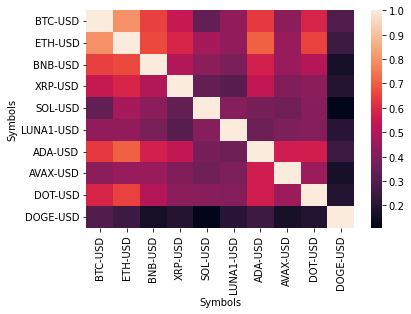

In [41]:
# A heatmap plot for cryptocurrency-to-cryptocurrency correlations, 2020 to end of 2021

hm_corr_20_21 = sn.heatmap(data=corr_20_21)
plt.show()

In [42]:
# Calculate sum of cryptocurrency-to-cryptocurrency correlations for each crypto, 2020 to end of 2021

correlations_20_21 = corr_20_21.sum(axis=1).sort_values(ascending = False)

display(correlations_20_21)

Symbols
ETH-USD      5.999816
BTC-USD      5.686773
ADA-USD      5.555960
BNB-USD      5.306176
DOT-USD      5.190609
XRP-USD      4.823350
AVAX-USD     4.663668
LUNA1-USD    4.338780
SOL-USD      4.247074
DOGE-USD     2.825678
dtype: float64

In [43]:
# Plot Sum of Cryptocurrency-to-Cryptocurrency Correlations, 2020 to end of 2021

corr_bar_20_21 = correlations_20_21.hvplot.bar(
    color="blue",
    ylabel="Sum of Correlations",
    title="Sum of Cryptocurrency-to-Cryptocurrency Correlations, 2020 through 2021",
    height=500,
    width=1000,
    label="2020 through 2021"
)
corr_bar_20_21

:Bars   [Symbols]   (0)

## Correlation 2022, YTD:

In [44]:
# Calculate cryptocurrency-to-cryptocurrency correlations, 2022 year-to-date
daily_returns_ytd = daily_returns_2016_present.loc["2022-01-01":"2022-05-05"]

corr_2022 = daily_returns_ytd.corr()

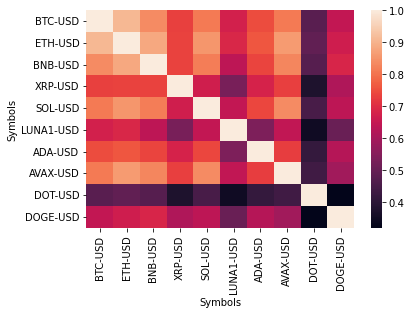

In [45]:
# A heatmap plot for cryptocurrency-to-cryptocurrency correlations, 2022 year-to-date

hm_corr_2022 = sn.heatmap(data=corr_2022)
plt.show()

# NOTE: Comapring heatmap from previous period, this heatmap is much lighter in color tones meaning increasing correlation!

In [46]:
# Calculate sum of cryptocurrency-to-cryptocurrency correlations for each crypto, 2022 year-to-date

correlations_2022 = corr_2022.sum(axis=1).sort_values(ascending = False)

display(correlations_2022)

Symbols
ETH-USD      7.841158
BTC-USD      7.640104
BNB-USD      7.626894
AVAX-USD     7.460700
SOL-USD      7.459500
ADA-USD      6.962673
XRP-USD      6.791428
DOGE-USD     6.293918
LUNA1-USD    6.207414
DOT-USD      4.789073
dtype: float64

In [47]:
# Plot Sum of Cryptocurrency-to-Cryptocurrency Correlations, 2022 Year-to-Date 

corr_bar_2022 = correlations_2022.hvplot.bar(
    color="orange",
    ylabel="Sum of Correlations",
    title="Sum of Cryptocurrency-to-Cryptocurrency Correlations, 2022 Year-to-Date",
    height=500,
    width=1000,
    label="2022 Year-to-Date"
)
corr_bar_2022

:Bars   [Symbols]   (0)

# Comparison: Cryptocurrency-to-cryptocurrency correlations by time period

In [48]:
# Plot Crypto-to-Crypto Correlations, 2016-2020 v. 2020-Present v. 2022 Year-to-Date

overlay_plot_corrs = corr_bar_2022 * corr_bar_20_21

overlay_plot_corrs.opts(
    ylabel="Sum of Correlations",
    title="Comparison: Crypto-to-Crypto Correlations, 2020 thru 2021 v. 2022 Year-to-Date",
    height=500,
    width=1000
)

#Note: Takeaway is cryptos are becoming increasingly correlated with each other

:Overlay
   .Bars.A_2022_Year_hyphen_minus_to_hyphen_minus_Date :Bars   [Symbols]   (0)
   .Bars.A_2020_through_2021                           :Bars   [Symbols]   (0)

# PART III - ANALYZING CRYPTOS AGAINST S&P 500 AND NASDAQ 100


## BTC analyzed against SPY ETF: Covariance, Beta, and Rolling Beta

In [49]:
btc_spy_qqq.head()

,BTC-USD,SPY,QQQ
Date,,,
2016-01-05,-0.002611,0.001691,-0.001735
2016-01-06,-0.006609,-0.012614,-0.009606
2016-01-07,0.067450,-0.023992,-0.031313
2016-01-08,-0.010519,-0.010977,-0.008201
2016-01-11,0.000975,0.000990,0.003077


In [50]:
#Calculate variance for SPY over select time periods

spy_variance_16_17 = btc_spy_qqq["SPY"].loc["2016-01-01":"2017-12-31"].var()
display(spy_variance_16_17)

spy_variance_18_19 = btc_spy_qqq["SPY"].loc["2018-01-01":"2019-12-31"].var()
display(spy_variance_18_19)

spy_variance_20_21 = btc_spy_qqq["SPY"].loc["2020-01-01":"2021-12-31"].var()
display(spy_variance_20_21)

spy_variance_ytd = btc_spy_qqq["SPY"].loc["2022-01-01":"2022-05-05"].var()
display(spy_variance_ytd)

4.297720459034328e-05

8.964736482604099e-05

0.00025679451850941137

0.00021550762760798306

In [51]:
#Calculate covariance of BTC with SPY as index over select time periods

cov_btc_spy_16_17 = btc_spy_qqq["BTC-USD"].loc["2016-01-01":"2017-12-31"].cov(btc_spy_qqq["SPY"].loc["2016-01-01":"2017-12-31"])

cov_btc_spy_18_19 = btc_spy_qqq["BTC-USD"].loc["2018-01-01":"2019-12-31"].cov(btc_spy_qqq["SPY"].loc["2018-01-01":"2019-12-31"])

cov_btc_spy_20_21 = btc_spy_qqq["BTC-USD"].loc["2020-01-01":"2021-12-31"].cov(btc_spy_qqq["SPY"].loc["2020-01-01":"2021-12-31"])

cov_btc_spy_ytd = btc_spy_qqq["BTC-USD"].loc["2022-01-01":"2022-05-05"].cov(btc_spy_qqq["SPY"].loc["2022-01-01":"2022-05-05"])

In [52]:
btc_spy_cov = pd.DataFrame(
    {"Covariance": [cov_btc_spy_16_17, cov_btc_spy_18_19, cov_btc_spy_20_21, cov_btc_spy_ytd]},
    index = ["2016-2017", "2018-2019", "2020-2021", "2022"]
)
btc_spy_cov

,Covariance
2016-2017,-0.000004
2018-2019,0.000021
2020-2021,0.000245
2022,0.000295


In [59]:
btc_spy_cov_plot = btc_spy_cov.hvplot.bar(
    title = "Covariance, BTC with SPY ETF", 
    width = 700,
    height = 400,
    xlabel="Time Period",
    color="red",
    label="BTC with SPY ETF",
    yformatter="%.4f"
)

btc_spy_cov_plot

:Bars   [index]   (Covariance)

In [60]:
#Calculate beta of BTC with SPY as index over select time periods

beta_btc_spy_16_17 = cov_btc_spy_16_17 / spy_variance_16_17
display(beta_btc_spy_16_17)

beta_btc_spy_18_19 = cov_btc_spy_18_19 / spy_variance_18_19
display(beta_btc_spy_18_19)

beta_btc_spy_20_21 = cov_btc_spy_20_21 / spy_variance_20_21
display(beta_btc_spy_20_21)

beta_btc_spy_ytd = cov_btc_spy_ytd / spy_variance_ytd 
beta_btc_spy_ytd

-0.08727464130606263

0.2349854841191014

0.9538604155832592

1.3679032066886279

In [61]:
btc_spy_betas = pd.DataFrame(
    {"Beta": [beta_btc_spy_16_17, beta_btc_spy_18_19, beta_btc_spy_20_21, beta_btc_spy_ytd]},
    index = ["2016-2017", "2018-2019", "2020-2021", "2022"]
)
btc_spy_betas

#Note: Beta measures how BTC moves relative to SPY

,Beta
2016-2017,-0.087275
2018-2019,0.234985
2020-2021,0.953860
2022,1.367903


In [62]:
btc_spy_betas_plot = btc_spy_betas.hvplot.bar(
    title = "Beta, BTC with SPY ETF", 
    width = 700,
    height = 400,
    xlabel="Time Period",
    color="Red",
    label="BTC with SPY ETF"
)

btc_spy_betas_plot

:Bars   [index]   (Beta)

In [63]:
# Get 90-day rolling variance for SPY ETF

rolling_var_spy = btc_spy_qqq["SPY"].loc["2016-01-01":"2022-05-05"].rolling(window=90).var()

In [64]:
# Get 90-day rolling covariance for BTC with SPY

rolling_cov_btc_spy = btc_spy_qqq["BTC-USD"].loc["2016-01-01":"2022-05-05"].rolling(window=90).cov(btc_spy_qqq["SPY"].loc["2016-01-01":"2022-05-05"])


In [65]:
# Get 90-day rolling beta

rolling_beta_btc_spy = rolling_cov_btc_spy / rolling_var_spy

In [66]:
# Plot 90-day rolling beta

rolling_beta_btc_spy_plot = rolling_beta_btc_spy.hvplot(   
    ylabel="Beta",
    title="Rolling Beta Between Bitcoin and SPY ETF, 2016 to Present",
    height=500,
    width=1200,
    color="red",
    label="Bitcoin and SPY ETF"
)

rolling_beta_btc_spy_plot 

#NOTE: Since 2020 we have had a postive beta between BTC and the S&P 500!

:Curve   [Date]   (0)

## BTC analyzed against QQQ: Covariance, Beta, and Rolling Beta

In [67]:
#Calculate variance for QQQ over select time periods

qqq_variance_16_17 = btc_spy_qqq["QQQ"].loc["2016-01-01":"2017-12-31"].var()
display(qqq_variance_16_17)

qqq_variance_18_19 = btc_spy_qqq["QQQ"].loc["2018-01-01":"2019-12-31"].var()
display(qqq_variance_18_19)

qqq_variance_20_21 = btc_spy_qqq["QQQ"].loc["2020-01-01":"2021-12-31"].var()
display(qqq_variance_20_21)

qqq_variance_ytd = btc_spy_qqq["QQQ"].loc["2022-01-01":"2022-05-05"].var()
display(qqq_variance_ytd)

7.260895700946784e-05

0.0001564403537356376

0.00031769458758027576

0.0004351954616002954

In [68]:
#Calculate covariance of BTC with QQQ as index over select time periods

cov_btc_qqq_16_17 = btc_spy_qqq["BTC-USD"].loc["2016-01-01":"2017-12-31"].cov(btc_spy_qqq["QQQ"].loc["2016-01-01":"2017-12-31"])

cov_btc_qqq_18_19 = btc_spy_qqq["BTC-USD"].loc["2018-01-01":"2019-12-31"].cov(btc_spy_qqq["QQQ"].loc["2018-01-01":"2019-12-31"])

cov_btc_qqq_20_21 = btc_spy_qqq["BTC-USD"].loc["2020-01-01":"2021-12-31"].cov(btc_spy_qqq["QQQ"].loc["2020-01-01":"2021-12-31"])

cov_btc_qqq_ytd = btc_spy_qqq["BTC-USD"].loc["2022-01-01":"2022-05-05"].cov(btc_spy_qqq["QQQ"].loc["2022-01-01":"2022-05-05"])

In [69]:
btc_qqq_cov = pd.DataFrame(
    {"Covariance": [cov_btc_qqq_16_17, cov_btc_qqq_18_19, cov_btc_qqq_20_21, cov_btc_qqq_ytd]},
    index = ["2016-2017", "2018-2019", "2020-2021", "2022"]
)
btc_qqq_cov

,Covariance
2016-2017,0.000002
2018-2019,0.000035
2020-2021,0.000283
2022,0.000458


In [70]:
btc_qqq_cov_plot = btc_qqq_cov.hvplot.bar(
    title = "Covariance, BTC with QQQ ETF", 
    width = 700,
    height = 400,
    xlabel="Time Period",
    color="blue",
    yformatter="%.4f",
    label="BTC with QQQ ETC"
)

btc_qqq_cov_plot

:Bars   [index]   (Covariance)

In [71]:
#Calculate beta of BTC with QQQ as index over select time periods

beta_btc_qqq_16_17 = cov_btc_qqq_16_17 / qqq_variance_16_17
display(beta_btc_qqq_16_17)

beta_btc_qqq_18_19 = cov_btc_qqq_18_19 / qqq_variance_18_19
display(beta_btc_qqq_18_19)

beta_btc_qqq_20_21 = cov_btc_qqq_20_21 / qqq_variance_20_21
display(beta_btc_qqq_20_21)

beta_btc_qqq_ytd = cov_btc_qqq_ytd / qqq_variance_ytd 
beta_btc_qqq_ytd

0.0337403591517058

0.22189383980554087

0.8922424729903152

1.0524135880659131

In [72]:
btc_qqq_betas = pd.DataFrame(
    {"Beta": [beta_btc_qqq_16_17, beta_btc_qqq_18_19, beta_btc_qqq_20_21, beta_btc_qqq_ytd]},
    index = ["2016-2017", "2018-2019", "2020-2021", "2022"]
)
btc_qqq_betas

#Note: Beta measures how BTC moves relative to SPY

,Beta
2016-2017,0.033740
2018-2019,0.221894
2020-2021,0.892242
2022,1.052414


In [73]:
btc_qqq_betas_plot = btc_qqq_betas.hvplot.bar(
    title = "Beta, BTC with QQQ ETF", 
    width = 700,
    height = 400,
    xlabel="Time Period",
    color="blue",
    label="BTC with QQQ ETF"
)

btc_qqq_betas_plot 

:Bars   [index]   (Beta)

In [74]:
# Get 90-day rolling variance for SPY ETF

rolling_var_qqq = btc_spy_qqq["QQQ"].loc["2016-01-01":"2022-05-05"].rolling(window=90).var()

In [75]:
# Get 90-day rolling covariance for BTC with SPY

rolling_cov_btc_qqq = btc_spy_qqq["BTC-USD"].loc["2016-01-01":"2022-05-05"].rolling(window=90).cov(btc_spy_qqq["QQQ"].loc["2016-01-01":"2022-05-05"])


In [76]:
# Get 90-day rolling beta

rolling_beta_btc_qqq = rolling_cov_btc_qqq / rolling_var_qqq

In [77]:
# Plot 90-day rolling beta

rolling_beta_btc_qqq_plot = rolling_beta_btc_qqq.hvplot(   
    ylabel="Beta",
    title="Rolling Beta Between Bitcoin and QQQ ETF, 2016 to Present",
    height=500,
    width=1200,
    color="blue",
    label="Bitcoin and QQQ ETF"
)
rolling_beta_btc_qqq_plot 

#NOTE: Since 2020 we have had a postive beta between BTC and the S&P 500!

:Curve   [Date]   (0)

## Comparison: BTC to SPY and BTC to QQQ for Covariance, Beta, and Rolling Beta 

In [78]:
overlay_spy_qqq_beta = btc_spy_betas_plot * btc_qqq_betas_plot

overlay_spy_qqq_beta.opts(
    ylabel="Beta",
    title="Comparison: BTC to SPY Beta v. BTC to QQQ Beta, 2016 to Present",
    height=500,
    width=1000
)

:Overlay
   .Bars.BTC_with_SPY_ETF :Bars   [index]   (Beta)
   .Bars.BTC_with_QQQ_ETF :Bars   [index]   (Beta)

In [79]:
overlay_spy_qqq_cov = btc_qqq_cov_plot * btc_spy_cov_plot 

overlay_spy_qqq_cov.opts(
    ylabel="Covariance",
    title="Comparison: BTC to SPY Covariance v. BTC to QQQ Covariance, 2016 to Present",
    height=500,
    width=1000
)

:Overlay
   .Bars.BTC_with_QQQ_ETC :Bars   [index]   (Covariance)
   .Bars.BTC_with_SPY_ETF :Bars   [index]   (Covariance)

In [80]:
overlay_spy_qqq_rolling_beta = rolling_beta_btc_spy_plot  * rolling_beta_btc_qqq_plot 

overlay_spy_qqq_rolling_beta.opts(
    ylabel="Covariance",
    title="Comparison: BTC to SPY Covariance v. BTC to QQQ Covariance, 2016 to Present",
    height=500,
    width=1000
)

:Overlay
   .Curve.Bitcoin_and_SPY_ETF :Curve   [Date]   (0)
   .Curve.Bitcoin_and_QQQ_ETF :Curve   [Date]   (0)

In [81]:
btc_spy_qqq_ytd = btc_spy_qqq.loc["2022-01-01":"2022-05-05"]

btc_spy_qqq_corr_ytd = btc_spy_qqq_ytd.corr()

btc_spy_qqq_corr_ytd

,BTC-USD,SPY,QQQ
BTC-USD,1.000000,0.524081,0.572982
SPY,0.524081,1.000000,0.962212
QQQ,0.572982,0.962212,1.000000


In [82]:
correlations_spy_2022 = btc_spy_qqq_corr_ytd.loc["SPY"]["BTC-USD"]
display(correlations_spy_2022)

correlations_qqq_2022 = btc_spy_qqq_corr_ytd.loc["QQQ"]["BTC-USD"]
correlations_qqq_2022

corr_markets_22 = pd.Series([correlations_spy_2022, correlations_qqq_2022], name="2022 year-to-date")
corr_markets_22

0.524081314772264

0    0.524081
1    0.572982
Name: 2022 year-to-date, dtype: float64

In [83]:
btc_spy_qqq_20_21 = btc_spy_qqq.loc["2020-01-01":"2021-12-31"]

btc_spy_qqq_corr_20_21 = btc_spy_qqq_20_21.corr()

btc_spy_qqq_corr_20_21

,BTC-USD,SPY,QQQ
BTC-USD,1.000000,0.345731,0.359707
SPY,0.345731,1.000000,0.918372
QQQ,0.359707,0.918372,1.000000


In [84]:
correlations_spy_20_21 = btc_spy_qqq_corr_20_21.loc["SPY"]["BTC-USD"]
display(correlations_spy_2022)

correlations_qqq_20_21 = btc_spy_qqq_corr_20_21.loc["QQQ"]["BTC-USD"]
correlations_qqq_20_21

corr_markets_20_21 = pd.Series([correlations_spy_20_21, correlations_qqq_20_21], name="2020 through 2021")
corr_markets_20_21

0.524081314772264

0    0.345731
1    0.359707
Name: 2020 through 2021, dtype: float64

In [85]:
btc_spy_qqq_18_19 = btc_spy_qqq.loc["2018-01-01":"2019-12-31"]

btc_spy_qqq_corr_18_19 = btc_spy_qqq_18_19.corr()

btc_spy_qqq_corr_18_19

,BTC-USD,SPY,QQQ
BTC-USD,1.000000,0.053569,0.066823
SPY,0.053569,1.000000,0.945844
QQQ,0.066823,0.945844,1.000000


In [86]:
correlations_spy_18_19 = btc_spy_qqq_corr_18_19.loc["SPY"]["BTC-USD"]
display(correlations_spy_2022)

correlations_qqq_18_19 = btc_spy_qqq_corr_18_19.loc["QQQ"]["BTC-USD"]
correlations_qqq_18_19

corr_markets_18_19 = pd.Series([correlations_spy_18_19, correlations_qqq_18_19], name="2018 through 2019")
corr_markets_18_19

0.524081314772264

0    0.053569
1    0.066823
Name: 2018 through 2019, dtype: float64

In [87]:
corr_series_list = [corr_markets_18_19, corr_markets_20_21, corr_markets_22]

In [88]:
corr_df = pd.DataFrame(data=corr_series_list)

corr_df.columns = ["SPY", "QQQ"]


corr_df

,SPY,QQQ
2018 through 2019,0.053569,0.066823
2020 through 2021,0.345731,0.359707
2022 year-to-date,0.524081,0.572982


In [89]:
corr_df_plot = corr_df.hvplot.bar(
    title = "Correlations, BTC with SPY and QQQ", 
    width = 700,
    height = 400,
    xlabel="Time Period",
    color="purple"
)

corr_df_plot

# NOTE: BTC is now strongly correlated with both SPY and QQQ (above .5)

:Bars   [index,Variable]   (value)